# 1.绘制不同类别植被指数均值标准差直方图

In [1]:
#数据类型：不同类别样本植被指数
#实验目的：1.计算不同类别各指数的均值和标准差
#          1.1读取表格中的数据
#          1.2预处理数据：提取不同类别指数，归一化指数，计算均值标准差
#          1.3画图

In [2]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt

## 1.1从excel种读取数据

In [3]:
#读取数据
JOVIs = pd.read_csv(r'G:\数据恢复\2021工作\0325_野外实验设计\4_第二届数字地球大会\3_实验处理\9_出图V2\2_植被指数\Fieldfeature0416.csv')
# JOVIs = pd.read_csv(r'G:\数据恢复\2021工作\0325_野外实验设计\4_第二届数字地球大会\3_实验处理\9_出图V2\2_植被指数\feature0325.csv')

## 1.2数据预处理（不同类别归一化均值标准差）

In [4]:
#按levelnew列（0，1值）提取不同类别数据
#0
JOVIs_healthy = JOVIs[JOVIs['levelnew']==0].iloc[:,4:10]
#按列明重新排列数据
JOVIs_healthy = JOVIs_healthy[['PSRI2','REDSI','DSWI1','NDVI','NDVIre2','TVI']]
#每列数据归一化
JOVIs_healthy_NOR = JOVIs_healthy.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
#求每列均值和标准差
JOVIs_healthy_mean = JOVIs_healthy_NOR.mean()
JOVIs_healthy_std = JOVIs_healthy_NOR.std()
# print(JOVIs_healthy_mean)
# print(JOVIs_healthy_std)

#1
JOVIs_disease = JOVIs[JOVIs['levelnew']==1].iloc[:,4:10]
#按列明重新排列数据
JOVIs_disease = JOVIs_disease[['PSRI2','REDSI','DSWI1','NDVI','NDVIre2','TVI']]
#每列数据归一化
JOVIs_disease_NOR = JOVIs_disease.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
#求每列均值和标准差
JOVIs_disease_mean = JOVIs_disease_NOR.mean()
JOVIs_disease_std = JOVIs_disease_NOR.std()
# print(JOVIs_disease_mean)
# print(JOVIs_disease_std)

## 1.3画图

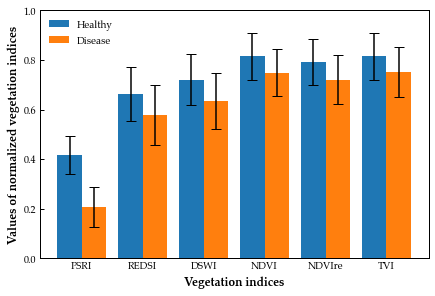

In [5]:
#统一设置图片字体
plt.rc('font',family='Palatino Linotype') #Times New Roman
#定义柱状图位置
#location 1
n1 = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
store1_x = [t*element + (1-w/2)*n1 for element in range(d)]

#Location 2
n2 = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
store2_x = [t*element + (1+w/2)*n1 for element in range(d)]
ax=plt.subplot()
#画柱状图
plt.bar(store1_x,JOVIs_healthy_mean,yerr=JOVIs_healthy_std/2,capsize=5)
plt.bar(store2_x,JOVIs_disease_mean,yerr=JOVIs_disease_std/2,capsize=5)
#设置图例内容，位置，透明显示
plt.legend(['Healthy','Disease'],loc="upper left").get_frame().set_linewidth(0.0)
#XY轴的刻度及标签
ax.set_xticks([1,3,5,7,9,11])
VIs_name = ["PSRI", "REDSI", "DSWI", "NDVI", "NDVIre", "TVI"]
ax.set_xticklabels(VIs_name)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
#去除x轴刻度，Y轴刻度向内
ax.tick_params(axis='x', which='both', length=0,direction='in')#
ax.tick_params(axis='y', which='both', direction='in',width=1)#
#设置XY轴名称，字体大小，加粗
plt.xlabel('Vegetation indices',size= 12,weight = 'bold')
plt.ylabel('Values of normalized vegetation indices',size= 12,weight = 'bold')
#去除边框线
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
#设置边框宽度
ax.spines['bottom'].set_linewidth('1.0')#设置边框线宽为2.0
ax.spines['top'].set_linewidth('1.0')#设置边框线宽为2.0
ax.spines['right'].set_linewidth('1.0')#设置边框线宽为2.0
ax.spines['left'].set_linewidth('1.0')#设置边框线宽为2.0
#去除图片周围空白
plt.subplots_adjust(top=0.98, bottom=0.12, right=0.99, left=0.09, hspace=0, wspace=0)
# plt.margins(0, 0)
plt.savefig('./VIs_barss.png', dpi=600)
plt.show()